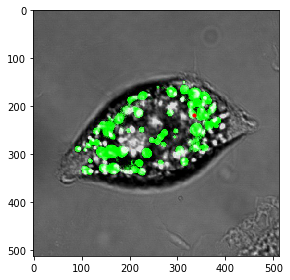

In [79]:


from skimage import color
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('acell.jpg')
imgGray = color.rgb2gray(img)

io.imshow(img)
plt.scatter([335],[218],c='r',s=10)
plt.show()

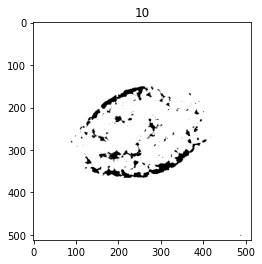

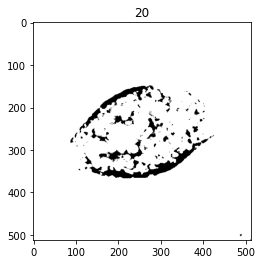

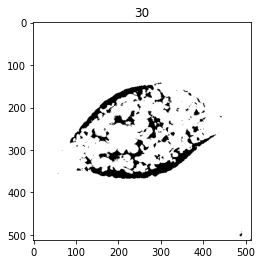

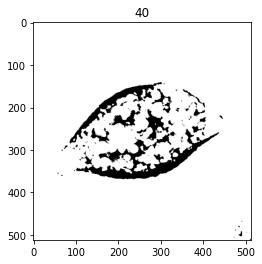

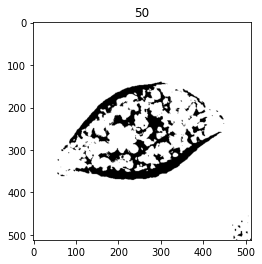

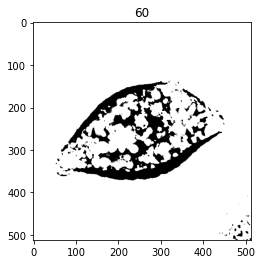

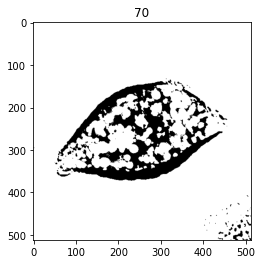

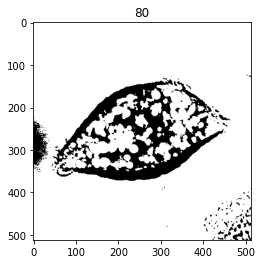

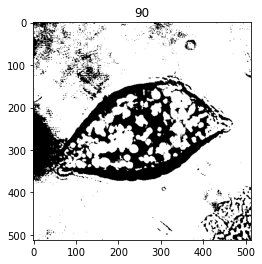

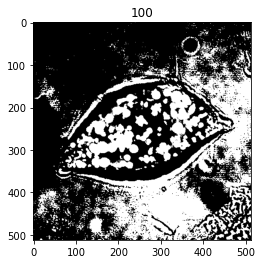

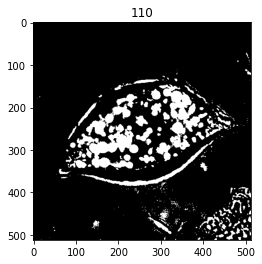

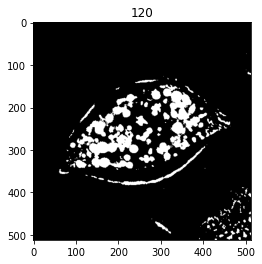

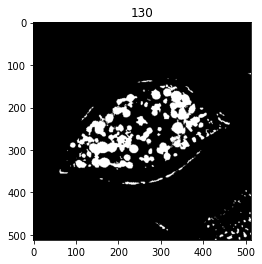

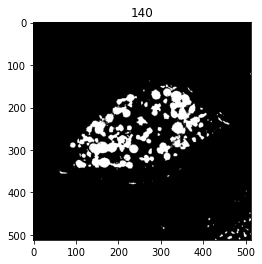

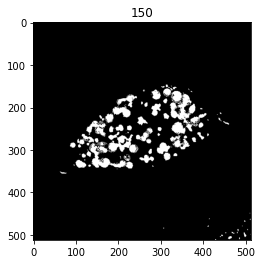

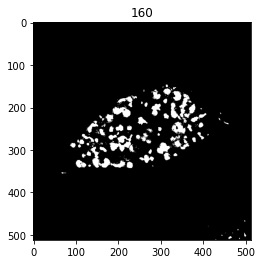

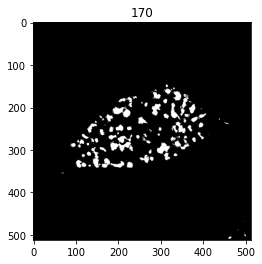

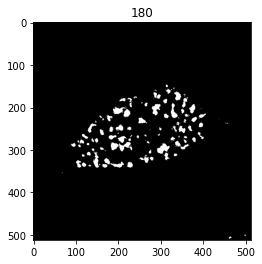

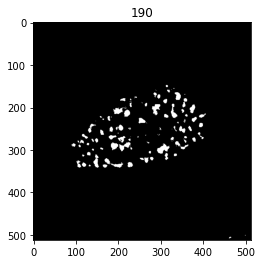

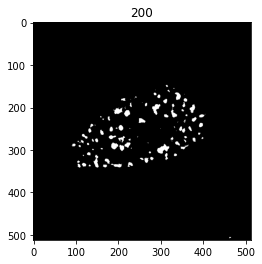

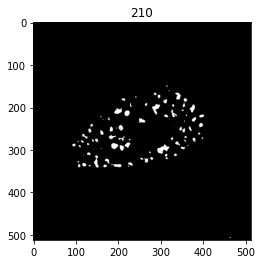

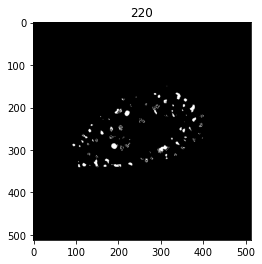

In [80]:

import cv2
man= cv2.imread("acell.jpg", 0)
for i in range(10,225,10):
    cutoff, thres_image = cv2.threshold(man, i, 255, cv2.THRESH_BINARY)
    plt.title(i)
    plt.imshow(thres_image , cmap="gray")
    plt.show()

just black and white isnt enough so we will be trying color seperation

In [81]:
print(img[335,218],img[300,500])


[  0 255   0] [100 100 100]


greeness is of importance

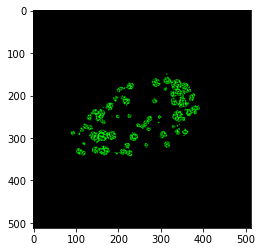

In [82]:
img_copy=img.copy()
img[:,:,0]=0
img[:,:,2]=0
img[img[:,:,1] < 255] = 0
plt.imshow(img)

In [83]:
Xs=[]
Ys=[]
for x in range(500):
    for y in range(500):
        if img[x,y,1]==255:
            Xs.append(x)
            Ys.append(y)
        

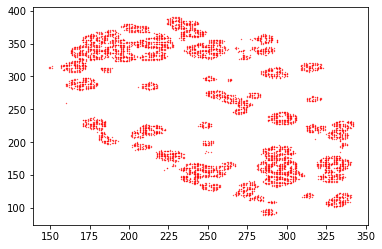

In [84]:
plt.scatter(Xs,Ys,c='r',s=0.1)

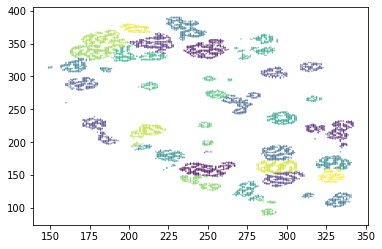

In [85]:
#Kmeans
from sklearn.cluster import KMeans
import numpy as np
X=np.array([Xs,Ys]).T
kmeans = KMeans(n_clusters=30, random_state=0).fit(X)
#plot clusters
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,s=0.1)

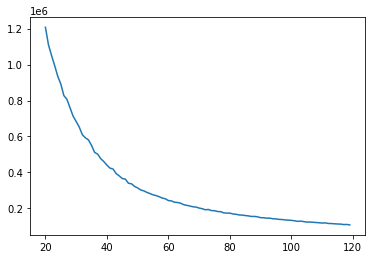

In [86]:
#use elbow methid to find optimal number of clusters
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X=np.array([Xs,Ys]).T
wcss = []
for i in range(20,120):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(20,120),wcss)


In [87]:
estimator = KMeans(n_clusters=50)
y_kmeans = estimator.fit_predict(X)

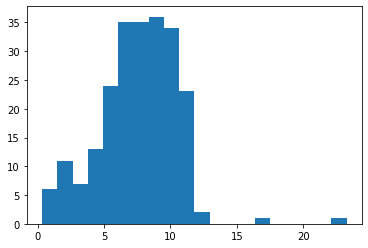

In [88]:
clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate Euclidian distance of 
each point within that cluster from its centroid and 
pick the maximum which is the radius of that cluster'''

#for cluster in list(set(y_kmeans)):
for cluster in [8]:
    
    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],estimator.cluster_centers_[:,1]))[cluster]
    radi = [np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X[y_kmeans == cluster, 0],X[y_kmeans == cluster, 1])]
    plt.hist(radi, bins=20)
    plt.show()

    #clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X[y_kmeans == cluster, 0],X[y_kmeans == cluster, 1])])



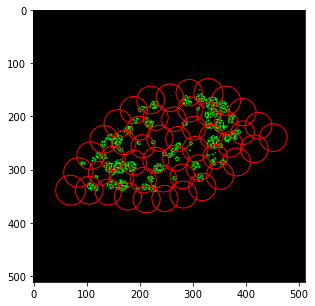

In [116]:
import matplotlib.patches as mpatches

n = 50
estimator = KMeans(n_clusters=n)
y_kmeans = estimator.fit_predict(X)
clusters_centroids=dict()
clusters_radii= dict()

for cluster in list(set(y_kmeans)):
    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],estimator.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster]))
                                    for i in zip(X[y_kmeans == cluster, 0],X[y_kmeans == cluster, 1])])

fig, ax = plt.subplots(1,figsize=(7,5))
for i in range(n):
    #plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 0, c = 'red')
    x, y = clusters_centroids[i]
    art = mpatches.Circle([y, x],clusters_radii[i], edgecolor='r',fill=False)
    ax.add_patch(art)
plt.imshow(img)
plt.show()

In [111]:
#find area of the circles
import math
a=0
area = 0
for i in range(n):
    area += math.pi * clusters_radii[i]**2
print(area)
a=area

93114.1559624065
93114.1559624065


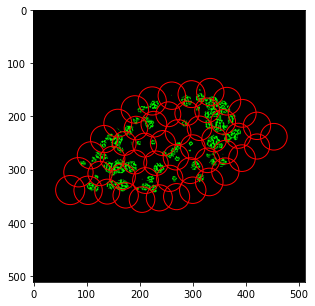

93992.60274734738


In [117]:
#find area of the toatal cell
import matplotlib.patches as mpatches

n = 50
estimator = KMeans(n_clusters=n)
y_kmeans = estimator.fit_predict(X)
clusters_centroids=dict()
clusters_radii= dict()

for cluster in list(set(y_kmeans)):
    clusters_centroids[cluster]=list(zip(estimator.cluster_centers_[:, 0],estimator.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X[y_kmeans == cluster, 0],X[y_kmeans == cluster, 1])])

fig, ax = plt.subplots(1,figsize=(7,5))
for i in range(n):
    # plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = 'red')
    x, y = clusters_centroids[i]
    art = mpatches.Circle([y, x],clusters_radii[i], edgecolor='r',fill=False)
    ax.add_patch(art)
plt.imshow(img)
plt.show()

import math
area = 0
A=0
for i in range(n):
    area += math.pi * clusters_radii[i]**2
print(area)
A=area

In [92]:
#finding relative area
print(a/A)

0.9773397726257964


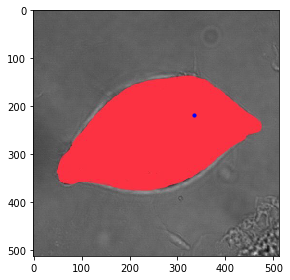

[  0 255   0] [0 0 0]


In [93]:
from skimage import color
from skimage import io
import matplotlib.pyplot as plt

imgb = io.imread('acellboundary.jpg')
imgGray = color.rgb2gray(imgb)

io.imshow(imgb)
plt.scatter([335],[218],c='b',s=10)
plt.show()

print(img[335,218],img[300,500])

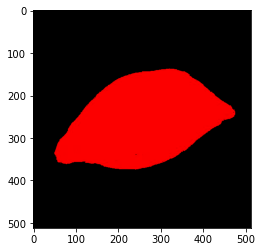

In [94]:
img_copy=imgb.copy()
imgb[:,:,1]=0
imgb[:,:,2]=0
imgb[imgb[:,:,0] < 225] = 0
plt.imshow(imgb)

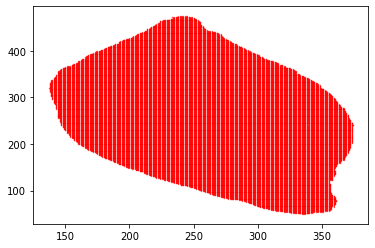

In [95]:
Xs=[]
Ys=[]
for x in range(500):
    for y in range(500):
        if imgb[x,y,0]>225:
            Xs.append(x)
            Ys.append(y)

plt.scatter(Xs,Ys,c='r',s=0.1)

64602
0.39048436330015696


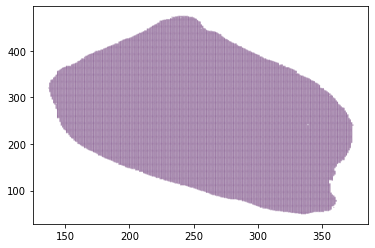

In [96]:
#dbscan
from sklearn.cluster import DBSCAN
import numpy as np
X=np.array([Xs,Ys]).T
db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

plt.scatter(X[:,0],X[:,1],c=db.labels_,s=0.01)

#calculate area of the plot
import math
area = 0
for i in range(len(Xs)):
    area += 1
print(area)
a=25226.07083791674
print(a/area)